In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

import random as python_random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10

# seed 를 설정해서 학습시마다 동일한 결과 유도. 불행히도 의도한 대로 동작하지 않음. 
def set_random_seed(seed_value):
    np.random.seed(seed_value)
    python_random.seed(seed_value)
    tf.random.set_seed(seed_value)

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels, scaling=True):
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    if scaling:
        images = np.array(images/255.0, dtype=np.float32)
    else:
        images = np.array(images, dtype=np.float32)
        
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels, scaling=False)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 


# random seed는 2021로 고정.
set_random_seed(2021)
# CIFAR10 데이터 재 로딩 및 Scaling/OHE 전처리 적용하여 학습/검증/데이터 세트 생성. 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_oh_labels.shape)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(42500, 32, 32, 3) (42500, 10) (7500, 32, 32, 3) (7500, 10) (10000, 32, 32, 3) (10000, 10)


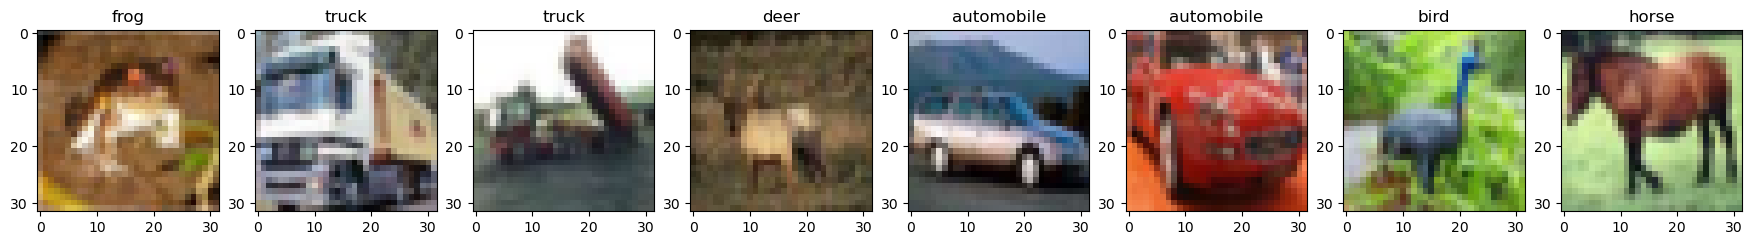

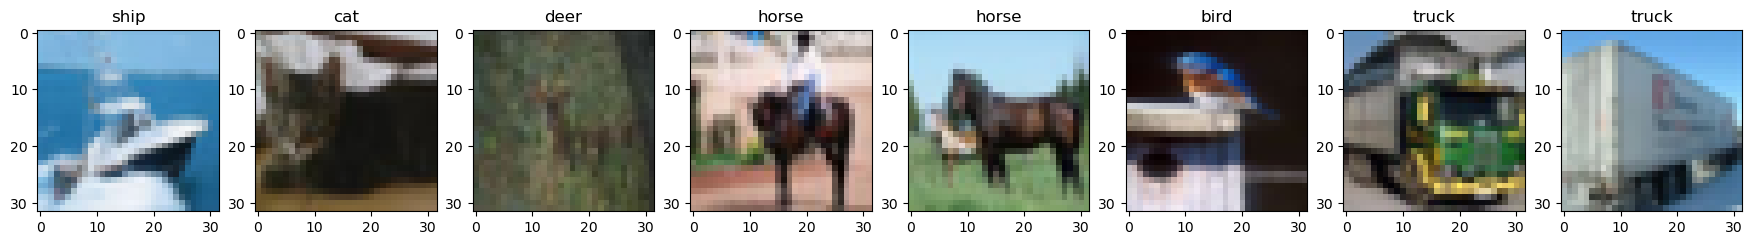

In [3]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()
        axs[i].set_title(NAMES[int(label)])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

In [4]:
tr_images[:10]

array([[[[  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  3.,   3.,   3.],
         ...,
         [  3.,   3.,   2.],
         [  3.,   3.,   1.],
         [  3.,   3.,   1.]],

        [[  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  3.,   3.,   3.],
         ...,
         [  3.,   3.,   2.],
         [  3.,   3.,   2.],
         [  3.,   3.,   2.]],

        [[  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  3.,   3.,   3.],
         ...,
         [  3.,   3.,   3.],
         [  3.,   3.,   4.],
         [  3.,   3.,   4.]],

        ...,

        [[ 21.,  18.,  39.],
         [ 18.,  14.,  37.],
         [ 15.,  11.,  35.],
         ...,
         [ 16.,  13.,  31.],
         [ 10.,   7.,  25.],
         [  8.,   5.,  22.]],

        [[ 23.,  20.,  40.],
         [ 20.,  17.,  39.],
         [ 20.,  17.,  39.],
         ...,
         [ 25.,  23.,  40.],
         [ 21.,  18.,  37.],
         [ 19.,  16.,  35.]],

        [[ 26.,  23.,  42.],
       

In [5]:
IMAGE_SIZE = 32
BATCH_SIZE = 64

### ImageDataGenerator로 Augmentation 설정하고 학습용, 검증용 Generator 생성

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    #rotation_range=20,
    #zoom_range=(0.7, 0.9),
    horizontal_flip=True,
    #vertical_flip=True,
    rescale=1/255.0
)
valid_generator = ImageDataGenerator(rescale=1/255.0) # 검증 데이터는 augmentation을 적용시키면 안됨(학습 수행하는 것이 아니므로)

flow_tr_gen = train_generator.flow(tr_images, tr_oh_labels, batch_size=BATCH_SIZE, shuffle=True)
flow_val_gen = valid_generator.flow(val_images, val_oh_labels, batch_size=BATCH_SIZE, shuffle=False)

### Keras CNN 모델 생성. 

In [7]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

def create_model(verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    #x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
    x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = Activation('relu')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    x = Conv2D(filters=256, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=256, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=512, kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Flatten 대신 Global AveragePooling 을 적용. 
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', name='fc1')(x)
    x = Dropout(rate=0.2)(x)
    output = Dense(10, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    if verbose:
        model.summary()
        
    return model

In [8]:
model = create_model(verbose=True)
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 5번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
# 10번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                             

In [9]:
image_batch, label_batch = next(flow_tr_gen) # ㅇ(next 수행시 데이터와 라벨을 반환하고, model.fit시 내부적으로 next 수행되기 때문에 model.fit시에는 라벨을 제외한 학습 데이터만 입력하면된다.)
print(image_batch.shape, label_batch.shape)
print(image_batch[0])

(64, 32, 32, 3) (64, 10)
[[[0.9921569  0.9921569  0.9921569 ]
  [0.9921569  0.9921569  0.9921569 ]
  [0.98823535 0.98823535 0.98823535]
  ...
  [0.98823535 0.98823535 0.98823535]
  [0.98823535 0.98823535 0.98823535]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         0.9960785  1.        ]
  ...
  [1.         0.9960785  0.9960785 ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         0.9960785  1.        ]
  ...
  [1.         0.9960785  0.9960785 ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         0.9960785 ]
  ...
  [1.         1.         0.9960785 ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.       

In [10]:
'''
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=32, epochs=30, shuffle=True,
                    validation_data=(val_images, val_oh_labels),  
                    callbacks=[rlr_cb, ely_cb] )
'''
# steps 횟수를 구하기 위해 학습 데이터의 건수와 검증 데이터의 건수를 구함. steps = ceil(학습 데이터 건수/BATCH_SIZE)
tr_data_len = tr_images.shape[0]
val_data_len = val_images.shape[0]
history = model.fit(flow_tr_gen, epochs=40, # 이제 학습 데이터를 모델에 넣는 역할은 Generator가 한다. (내부적으로 next가 호출되어서 images와 labels를 반환하기 때문에 labels 값은 안넣어줘도 된다.)
                    steps_per_epoch=int(np.ceil(tr_data_len/BATCH_SIZE)), # 학습데이터의 steps, np.ceil()은 반올림 함수, 전체 데이터가 6400개 이고, batch_size가 64면 steps는 100
                    validation_data=flow_val_gen, 
                    validation_steps=int(np.ceil(val_data_len/BATCH_SIZE)), # validation 데이터의 steps, np.ceil()은 반올림 함수, 전체 데이터가 6400개 이고, batch_size가 64면 steps는 100
                    callbacks=[rlr_cb, ely_cb])

Epoch 1/40
665/665 [==============================] - 25s 18ms/step - loss: 1.4584 - accuracy: 0.4689 - val_loss: 1.3284 - val_accuracy: 0.5501 - lr: 0.0010
Epoch 2/40
665/665 [==============================] - 11s 16ms/step - loss: 1.0072 - accuracy: 0.6474 - val_loss: 0.9969 - val_accuracy: 0.6509 - lr: 0.0010
Epoch 3/40
665/665 [==============================] - 11s 16ms/step - loss: 0.8228 - accuracy: 0.7182 - val_loss: 1.3073 - val_accuracy: 0.5667 - lr: 0.0010
Epoch 4/40
665/665 [==============================] - 11s 16ms/step - loss: 0.6975 - accuracy: 0.7629 - val_loss: 0.9424 - val_accuracy: 0.6793 - lr: 0.0010
Epoch 5/40
665/665 [==============================] - 11s 16ms/step - loss: 0.6075 - accuracy: 0.7974 - val_loss: 1.0062 - val_accuracy: 0.6564 - lr: 0.0010
Epoch 6/40
665/665 [==============================] - 11s 17ms/step - loss: 0.5390 - accuracy: 0.8210 - val_loss: 0.6944 - val_accuracy: 0.7565 - lr: 0.0010
Epoch 7/40
665/665 [==============================] - 11s 

In [11]:
test_generator = ImageDataGenerator(rescale=1/255.0)
flow_test_gen = test_generator.flow(test_images, test_oh_labels, batch_size=BATCH_SIZE, shuffle=False)
model.evaluate(flow_test_gen)

157/157 [==============================] - 1s 9ms/step - loss: 0.5877 - accuracy: 0.8898


[0.5876580476760864, 0.8898000121116638]

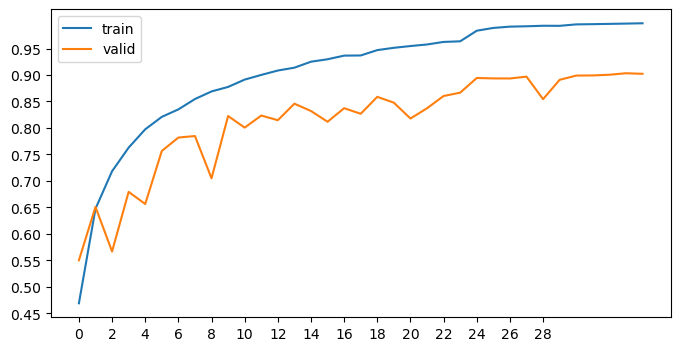

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(8, 4))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.xticks(np.arange(0, 30, 2))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

### 원본 이미지 상황에 맞지 않거나 과도한 Augmentation은 오히려 성능을 저하시킴.

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator( # But 이정도 Augmentation은 과도하지는 않다.
    rotation_range=20,
    zoom_range=(0.7, 0.9), # 이미 CIFAR10 데이터는 물체가 이미지의 가운데에 위치해있는데 zoom을 해버리면 학습 성능이 떨어질 수 있다.
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255.0
)

valid_generator = ImageDataGenerator(rescale=1/255.0)

flow_tr_gen = train_generator.flow(tr_images, tr_oh_labels, batch_size=BATCH_SIZE, shuffle=True)
flow_val_gen = valid_generator.flow(val_images, val_oh_labels, batch_size=BATCH_SIZE, shuffle=False)

model = create_model()
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 5번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
# 10번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# steps 횟수를 구하기 위해 학습 데이터의 건수와 검증 데이터의 건수를 구함. steps = ceil(학습 데이터 건수/BATCH_SIZE)
tr_data_len = tr_images.shape[0]
val_data_len = val_images.shape[0]

history = model.fit(flow_tr_gen, epochs=40, 
                    steps_per_epoch=int(np.ceil(tr_data_len/BATCH_SIZE)),
                    validation_data=flow_val_gen, 
                    validation_steps=int(np.ceil(val_data_len/BATCH_SIZE)),
                    callbacks=[rlr_cb, ely_cb], verbose=1)


Epoch 1/40
665/665 [==============================] - 33s 41ms/step - loss: 1.7936 - accuracy: 0.3338 - val_loss: 2.5616 - val_accuracy: 0.2517 - lr: 0.0010
Epoch 2/40
665/665 [==============================] - 28s 42ms/step - loss: 1.4604 - accuracy: 0.4701 - val_loss: 2.1233 - val_accuracy: 0.3528 - lr: 0.0010
Epoch 3/40
665/665 [==============================] - 26s 40ms/step - loss: 1.2648 - accuracy: 0.5495 - val_loss: 2.3684 - val_accuracy: 0.4068 - lr: 0.0010
Epoch 4/40
665/665 [==============================] - 28s 42ms/step - loss: 1.1472 - accuracy: 0.5934 - val_loss: 1.9762 - val_accuracy: 0.4256 - lr: 0.0010
Epoch 5/40
665/665 [==============================] - 26s 39ms/step - loss: 1.0462 - accuracy: 0.6290 - val_loss: 1.8401 - val_accuracy: 0.4881 - lr: 0.0010
Epoch 6/40
665/665 [==============================] - 27s 41ms/step - loss: 0.9971 - accuracy: 0.6510 - val_loss: 1.2503 - val_accuracy: 0.6075 - lr: 0.0010
Epoch 7/40
665/665 [==============================] - 27s 

In [14]:
test_generator = ImageDataGenerator(rescale=1/255.0)
flow_test_gen = test_generator.flow(test_images, test_oh_labels, batch_size=BATCH_SIZE, shuffle=False)
model.evaluate(flow_test_gen)

157/157 [==============================] - 1s 9ms/step - loss: 0.5785 - accuracy: 0.8163


[0.5785099864006042, 0.8162999749183655]